In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
from PIL import Image
%matplotlib inline

### os
* os.getcwd()
* os.listdir()

In [6]:
os.getcwd()

'/Users/slidemorning/Slideworkspace/Github/tensorflow-2.0'

In [7]:
os.listdir('dataset/mnist_png/training/0/')

['16585.png',
 '24537.png',
 '25629.png',
 '20751.png',
 '34730.png',
 '15926.png',
 '22152.png',
 '35348.png',
 '22634.png',
 '6819.png',
 '32427.png',
 '24245.png',
 '33739.png',
 '44599.png',
 '12907.png',
 '38644.png',
 '28457.png',
 '40099.png',
 '49903.png',
 '26308.png',
 '28325.png',
 '29985.png',
 '31112.png',
 '25167.png',
 '1179.png',
 '46371.png',
 '9257.png',
 '10645.png',
 '18219.png',
 '4773.png',
 '56176.png',
 '19649.png',
 '55457.png',
 '41350.png',
 '48412.png',
 '54985.png',
 '18543.png',
 '38693.png',
 '29211.png',
 '36331.png',
 '22344.png',
 '43976.png',
 '7911.png',
 '41807.png',
 '16787.png',
 '23728.png',
 '7905.png',
 '32625.png',
 '22436.png',
 '13833.png',
 '57917.png',
 '29205.png',
 '22378.png',
 '52847.png',
 '27200.png',
 '39758.png',
 '38446.png',
 '88.png',
 '55682.png',
 '9914.png',
 '31310.png',
 '5690.png',
 '41191.png',
 '31476.png',
 '46826.png',
 '35823.png',
 '4565.png',
 '48638.png',
 '4203.png',
 '14153.png',
 '34283.png',
 '9733.png',
 '6400

### glob
* glob.glob()

In [11]:
data_paths = glob.glob('dataset/mnist_png/training/*/*.png')

In [12]:
len(data_paths)

60000

In [13]:
data_paths[0]

'dataset/mnist_png/training/9/36655.png'

In [14]:
data_paths[-1]

'dataset/mnist_png/training/5/37552.png'

In [15]:
path = data_paths[0]

In [16]:
path

'dataset/mnist_png/training/9/36655.png'

### Data 분석 (MNIST)

In [17]:
os.listdir('dataset/mnist_png/training/')

['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']

In [18]:
len(os.listdir('dataset/mnist_png/training/'))

10

### Data 별 갯수 비교

In [19]:
label_nums = os.listdir('dataset/mnist_png/training/')
label_nums

['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']

In [27]:
nums_dataset = []
for lbl_n in label_nums:
    data_per_class = len(os.listdir('dataset/mnist_png/training/' + lbl_n))
    print('dataset/mnist_png/training/' + lbl_n, len(os.listdir('dataset/mnist_png/training/' + lbl_n)))
    nums_dataset.append(data_per_class)

dataset/mnist_png/training/9 5949
dataset/mnist_png/training/0 5923
dataset/mnist_png/training/7 6265
dataset/mnist_png/training/6 5918
dataset/mnist_png/training/1 6742
dataset/mnist_png/training/8 5851
dataset/mnist_png/training/4 5842
dataset/mnist_png/training/3 6131
dataset/mnist_png/training/2 5958
dataset/mnist_png/training/5 5421


In [31]:
for l, n in zip(label_nums, nums_dataset):
    print(l, n)

9 5949
0 5923
7 6265
6 5918
1 6742
8 5851
4 5842
3 6131
2 5958
5 5421


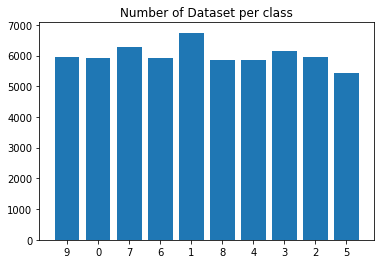

In [32]:
plt.bar(label_nums, nums_dataset)
plt.title('Number of Dataset per class')
plt.show()

## Image 확인

### Pillow
* Image.open()
* np.array(Image.open()) # convert

In [33]:
path # sample image path

'dataset/mnist_png/training/9/36655.png'

In [35]:
image_pil = Image.open(path)
image_pil

In [38]:
image = np.array(image_pil)

In [39]:
image.shape

(28, 28)

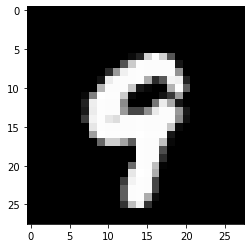

In [40]:
plt.imshow(image, 'gray')
plt.show()

### TensorFlow
* tf.io.read_file()
* tf.io.decode_image()

In [45]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [42]:
image.shape

TensorShape([28, 28, 1])

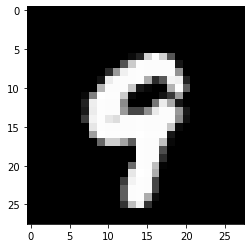

In [43]:
plt.imshow(image[:, :, 0], 'gray')
plt.show()

### Label 확인
* split()

In [47]:
path

'dataset/mnist_png/training/9/36655.png'

In [48]:
path.split('/')

['dataset', 'mnist_png', 'training', '9', '36655.png']

In [50]:
label = path.split('/')[-2]
label

'9'

In [51]:
type(label)

str

In [52]:
def get_label(path):
    class_name = path.split('/')[-2]
    label = int(class_name)
    return label

In [53]:
path, get_label(path)

('dataset/mnist_png/training/9/36655.png', 9)

### data shape 확인
* tqdm
* np.unique()

In [83]:
heights = []
widths = []

In [86]:
len(data_paths)

60000

In [87]:
for path in data_paths:
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w = image.shape
    
    heights.append(h)
    widths.append(w)

In [88]:
np.unique(heights)

array([28])

In [89]:
np.unique(widths)

array([28])

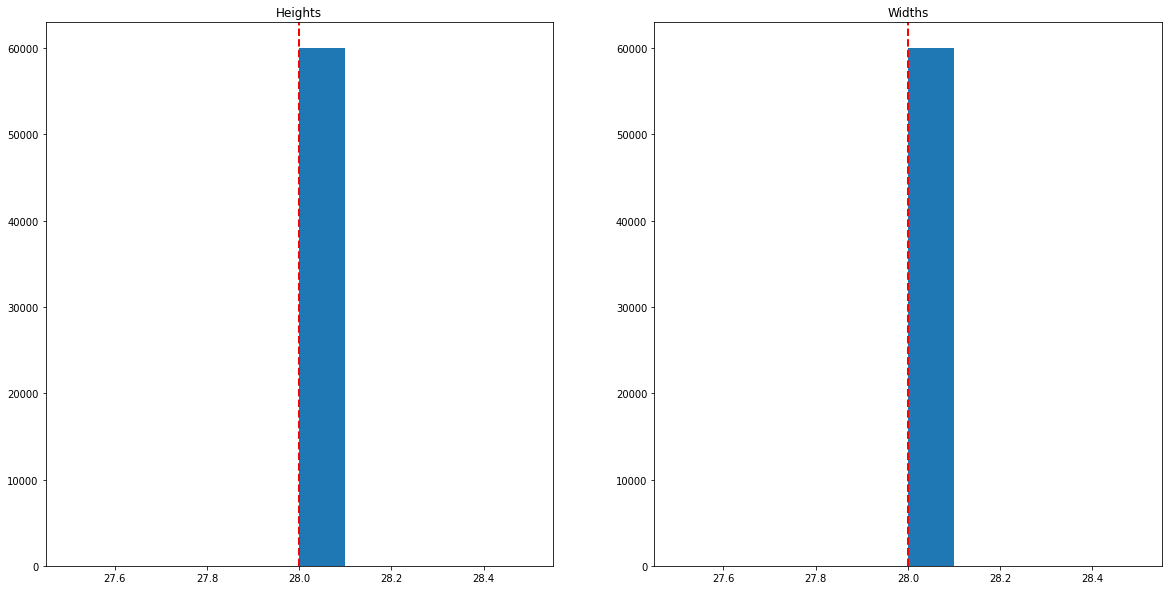

In [91]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), color='r', linestyle='dashed', linewidth=2)

plt.subplot(122)
plt.hist(widths)
plt.title('Widths')
plt.axvline(np.mean(widths), color='r', linestyle='dashed', linewidth=2)
plt.show()